<ipython-input-10-2e57357af80e>:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


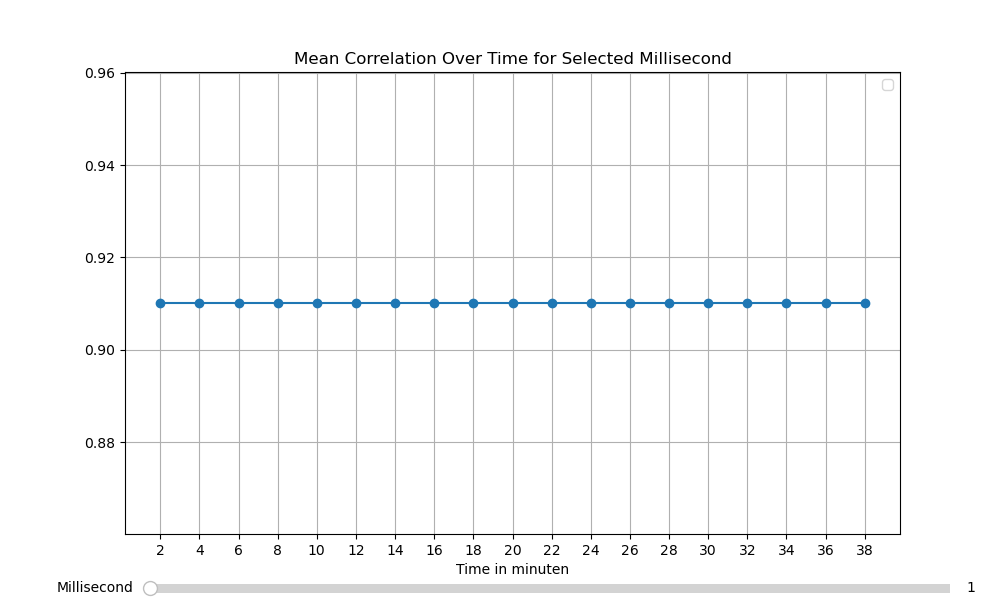

"correlation_means = np.zeros((num_millisecond*num_sec, num_k)) # Array to hold mean correlations for each millisecond\nfor ms in range(num_millisecond*num_sec):\n    correlations = []\n    for k in range(num_k):  \n        temp_correlations = []\n        for i in range(data_all.shape[0] - k):\n            corr_matrix = np.corrcoef(data_all[i, :, ms], data_all[i + k, :, ms])  # Correlation for each millisecond\n            \n            temp_correlations.append(corr_matrix[0][1])\n        correlations.append(np.mean(temp_correlations))\n    correlation_means[ms] = np.mean(correlations)\ncorr_filename = f'correlation_mean.npy'\nnp.save (corr_filename,correlation_means)"

In [ ]:
#%%

%matplotlib widget
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from matplotlib.widgets import Slider

# Informationen
load_path = "/media/student/SEW/Bearbeitet_Data/Rx2/Tag2_Scenario3_Besondermessungen"
round_numbers = [243,244,245,246,247,248,250,251,252,253,254,257,258,259,260,261,262,264,265,266]
#round_number =244
seconds = []
data = []

for filenames in os.listdir(load_path):
    if filenames.split("_")[5] == '0' :
            
        for round_number in round_numbers:
            #print(f"all file:{filenames}")

            if filenames.startswith(f"Round_{round_number}") and filenames.endswith(".mat"):
                    #print(filenames)
                
                    r = int (filenames.split("_")[7].replace(".mat",""))

                    if r > 20 :
                        continue

                    seconds.append((round_number,r))

                    file_path = os.path.join(load_path,filenames)
                    mat = scipy.io.loadmat(file_path)
                    
                    cirs = mat['cirs']

                    data_1 = np.abs(cirs) ** 2 
                    #print (f"round:{round_number},second:{r},data_1:{data_1}")

                    data.append(data_1)
        #print (f"round:{round_number},second:{r},data_1:{data}")
    

seconds.sort(key=lambda x: (x[0], x[1]))
#print (f"second ist {seconds}")


data = np.array(data) 
#print (f"data shape: {data.shape}")

num_round = 20
num_sec = 20
number = data.shape[0]
num_delay = data.shape[1]
num_millisecond = data.shape[2]
data_array = np.zeros((num_round * num_sec, num_delay, num_millisecond))
for  i in range(number):
     data_array[i] =  data[i]
data_array_reshaped = data_array.reshape((num_round, num_sec, num_delay, num_millisecond))
#print(f"Filled data_array_reshaped shape: {data_array_reshaped.shape}")
data_all = np.concatenate(data_array_reshaped,axis=2)
#print(f"shape of the data_all :{data_all.shape}")

#Correlation-calculation

num_k = 19

correlation_means = np.load('correlation_mean.npy')

# Figure with slider
fig, ax = plt.subplots(figsize=(10, 6))
x_values = np.arange(1, num_k + 1) * 2
line, = ax.plot(x_values,correlation_means[0], marker='o')
ax.set_title('Mean Correlation Over Time for Selected Millisecond')
ax.set_xlabel('Time in minuten')


# Slider 
ax_slider = plt.axes([0.15, 0.005, 0.8, 0.03])  # [left, bottom, width, height]
slider = Slider(ax_slider, 'Millisecond', 1, num_millisecond*num_sec , valinit=1, valstep=1)

def update(val):
    ms_index = int(slider.val)  -1
    line.set_ydata(correlation_means[ms_index])  
    ax.relim()  
    ax.autoscale_view()  
    fig.canvas.draw_idle()  

slider.on_changed(update)

ax.set_xticks(x_values)
 
ax.grid(True)
ax.legend()
plt.show()

'''for i,cirs_data in enumerate(data):
    cirs_data = np.array(cirs_data)
    round_number,second = seconds[i]
    print (f"rf 0 shape of the cirs ar index {i}:round :{round_number},second: {second},{cirs_data.shape}")'''  

'''correlation_means = np.zeros((num_millisecond*num_sec, num_k)) # Array to hold mean correlations for each millisecond
for ms in range(num_millisecond*num_sec):
    correlations = []
    for k in range(num_k):  
        temp_correlations = []
        for i in range(data_all.shape[0] - k):
            corr_matrix = np.corrcoef(data_all[i, :, ms], data_all[i + k, :, ms])  # Correlation for each millisecond
            
            temp_correlations.append(corr_matrix[0][1])
        correlations.append(np.mean(temp_correlations))
    correlation_means[ms] = np.mean(correlations)
corr_filename = f'correlation_mean.npy'
np.save (corr_filename,correlation_means)'''